In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [18]:
df = pd.read_csv('second_lab.csv', delimiter=';')
d = 0.19
S = 0.2 ** 2 * math.pi * 0.25


In [19]:
print(df.columns)

df['I'] = df['I'] / 100 #так как единицы измерения миливольты

Index(['I', 'U'], dtype='object')


In [21]:
delta_U = 0.01  # Абсолютная погрешность U
delta_I = 0.001 # Абсолютная погрешность I


df['delta_U'] = delta_U
df['delta_I'] = delta_I

df.head(12)

,I,U,delta_U,delta_I
0,0.058,0.05,0.01,0.001
1,0.134,0.16,0.01,0.001
2,0.240,0.29,0.01,0.001
3,0.315,0.36,0.01,0.001
4,0.334,0.41,0.01,0.001
5,0.455,0.58,0.01,0.001
6,0.633,0.80,0.01,0.001
7,0.702,0.88,0.01,0.001
8,0.770,0.98,0.01,0.001
9,1.009,1.10,0.01,0.001


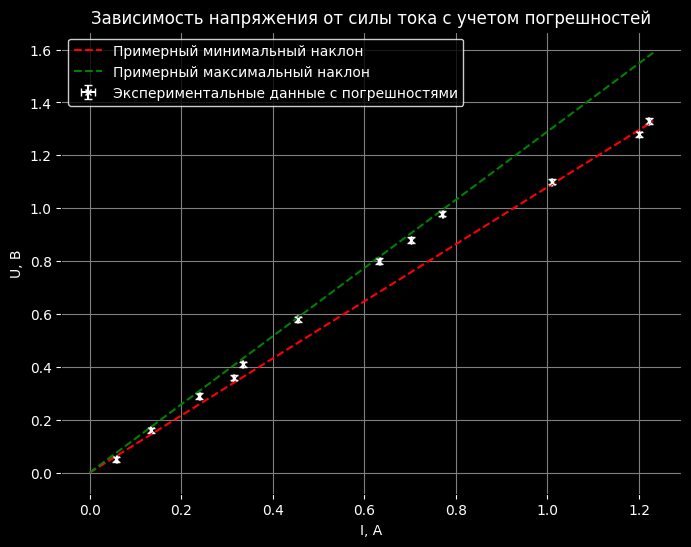

kmin = 1.0800 Ом
kmax = 1.2900 Ом
Среднее значение k = 1.1850 Ом
Сопротивление R = 1.1850 Ом ± 0.1050 Ом
Площадь 0.031415926535897934
Длина 0.19
Удельно сопротивление ρ = R * S / l = 0.1959 Oм*мм^2/м +- 0.0174 Oм*мм^2/м


In [16]:
plt.figure(figsize=(8, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

plt.errorbar(
    df['I'], df['U'], xerr=df['delta_I'], yerr=df['delta_U'],
    fmt='x', markersize=5, color='white', ecolor='white', capsize=3,
    label='Экспериментальные данные с погрешностями'
)

tan_k_min = 1.08
tan_k_max = 1.29

I_plot = np.linspace(0, df['I'].max() + 0.01, 100)
U_min_line = tan_k_min * I_plot
U_max_line = tan_k_max * I_plot

plt.plot(I_plot, U_min_line, 'r--', label='Примерный минимальный наклон')
plt.plot(I_plot, U_max_line, 'g--', label='Примерный максимальный наклон')

plt.xlabel('I, А', color='white')
plt.ylabel('U, В', color='white')
plt.title('Зависимость напряжения от силы тока с учетом погрешностей', color='white')

# Настройка легенды
legend = plt.legend(facecolor='black', edgecolor='white')
for text in legend.get_texts():
    text.set_color('white')

# Настройка цвета делений осей
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Настройка сетки
plt.grid(True, color='gray')

plt.show()

k_avg = (tan_k_min + tan_k_max) / 2

delta_R = (tan_k_max - tan_k_min) / 2

R = k_avg
print(f'kmin = {tan_k_min:.4f} Ом')
print(f'kmax = {tan_k_max:.4f} Ом')
print(f'Среднее значение k = {k_avg:.4f} Ом')
print(f'Сопротивление R = {R:.4f} Ом ± {delta_R:.4f} Ом')
print(f'Площадь {S}')
print(f'Длина {d}')
print(f'Удельно сопротивление ρ = R * S / l = {(R * S / d):.4f} Oм*мм^2/м +- {(delta_R * S / d):.4f} Oм*мм^2/м')
